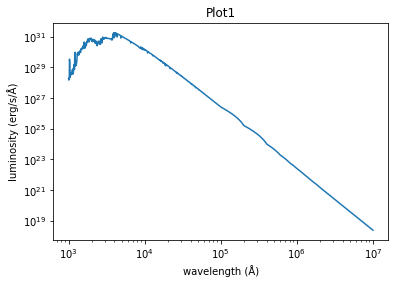

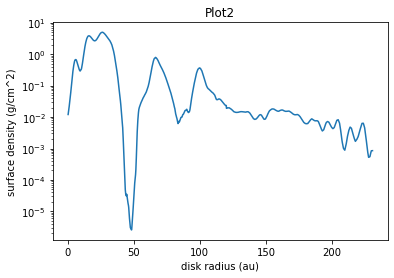

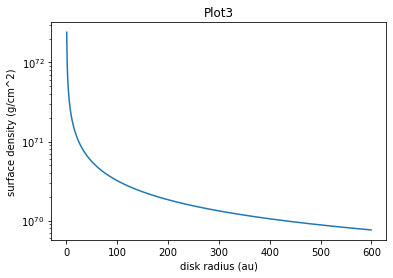

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import math

filename1 = '/Users/mengfeilong/desktop/HD163296_spectra_modified_UV.txt'
data1 = np.loadtxt(filename1)
a = data1[:,0]
b = data1[:,1]
plt.loglog(a, b)
plt.xlabel(r'wavelength (Å)')
plt.ylabel(r'luminosity (erg/s/Å)')
plt.title(r'Plot1')
plt.show()

filename2 = '/Users/mengfeilong/desktop/sigma_lgdust_HD163296.txt'
data2 = np.loadtxt(filename2)
r = data2[:,0]
z = data2[:,1]
plt.semilogy(r,z)
plt.title(r'Plot2')
plt.xlabel(r'disk radius (au)')
plt.ylabel(r'surface density (g/cm^2)')
plt.show()

Md = 0.000266666666667 * 1.9891 * 10 ** 33
gam = 0.8
rc = 165.0 * 149597871 * 100000
sigma_c = ((2 - gam) * Md) / (2 * math.pi) * rc ** 2
sigma_gr = sigma_c * ((x / rc) ** (-1 * gam)) * np.exp((-1 * (x / rc) ** (2 - gam)))
plt.semilogy(x, sigma_gr)
plt.title(r'Plot3')
plt.xlabel(r'disk radius (au)')
plt.ylabel(r'surface density (g/cm^2)')
plt.show()

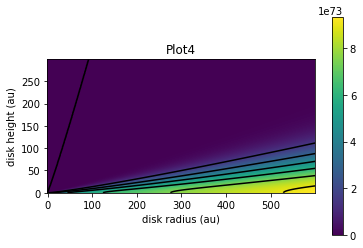

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import math

Md = 0.14 * 1.9891 * 10 ** 33
gam = 0.8
rc = 165.0 * 149597871 * 100000
r_ref = 100.0
h_ref = 8.44
psi = 1.08
x = np.arange(0.45, 600.0)
y = np.arange(0, 300.0)
r, z = np.meshgrid(x, y)
sigma_c = ((2 - gam) * Md) / (2 * math.pi) * rc ** 2
sigma_gr = sigma_c * ((r / rc) ** (-1 * gam)) * np.exp((-1 * (r / rc) ** (2 - gam)))
Hr = h_ref * (r / r_ref) ** psi
P = (sigma_gr / ((2 * math.pi) ** (0.5)) * Hr) * np.exp(-0.5 * (z / Hr) ** 2)
plt.imshow(P, origin = 'lower')
plt.title(r'Plot4')
plt.xlabel(r'disk radius (au)')
plt.ylabel(r'disk height (au)')
plt.colorbar()
plt.contour(r, z, P, colors = 'black')
plt.show()